In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import linregress
from scipy.stats import linregress

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-86.01717099774227 159.62713557986706
-13.632670677001869 6.0510518717140656
83.52883101722608 101.94296752866285
79.22414087313305 -4.419761947558953
-38.547414080265526 -99.83332471311343
-85.1226239849849 -18.916404814454495
48.94328796561652 -154.99232053306645
-25.674759249010677 -134.92443450373986
-31.99112087393457 133.50111093746034
-33.35276383338703 -63.29893149843328
8.272078337014051 -50.53378169154493
0.8530333760944444 126.25327164072223
45.02836745657075 -13.534925526063802
70.14401276772637 -19.207936881404578
74.12632177972674 154.98099544893745
25.46912984700529 116.1081315805402
67.31086002230921 12.893580555644405
-34.64444072457715 47.576763239693804
-71.80447516885707 -148.69064209714958
38.599170809817 -109.54097891164426
-26.048361404542135 -9.491612564538883
-82.3609648673407 77.90985334679982
66.82274283323204 -113.40135621321083
58.182583095119924 -143.64687871433918
-45.1110275531369 13.403378425418794
-26.45992400789158 80.85120737735718
44.48577988273439 

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [10]:
# Starting URL for Weather Map API Call.
url = (
    "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
    + weather_api_key
)

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime(
            "%Y-%m-%d %H:%M:%S"
        )
        # Append the city information into city_data list.
        city_data.append(
            {
                "City": city.title(),
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | flinders
Processing Record 10 of Set 1 | villa maria
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | ternate
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | srednekolymsk
Processing Record 16 of Set 1 | longyan
Processing Record 17 of Set 1 | sorland
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | redlands
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | bu

Processing Record 39 of Set 4 | chongwe
Processing Record 40 of Set 4 | san nicolas
Processing Record 41 of Set 4 | jumla
Processing Record 42 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 43 of Set 4 | lesnoy
Processing Record 44 of Set 4 | ko samui
Processing Record 45 of Set 4 | anar darreh
City not found. Skipping...
Processing Record 46 of Set 4 | sakakah
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | at-bashi
Processing Record 49 of Set 4 | san vicente
Processing Record 50 of Set 4 | popondetta
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | abong mbang
Processing Record 3 of Set 5 | ulaangom
Processing Record 4 of Set 5 | himare
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | latung
Processing Record 7 of Set 5 | solsvik
City not found. Skipping...
Processing Record 8 of Set 5 | masvingo
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | cabedelo
Processing Record

Processing Record 28 of Set 8 | jatiroto
Processing Record 29 of Set 8 | pasighat
Processing Record 30 of Set 8 | baft
Processing Record 31 of Set 8 | lloydminster
Processing Record 32 of Set 8 | talara
Processing Record 33 of Set 8 | birjand
Processing Record 34 of Set 8 | lichfield
Processing Record 35 of Set 8 | valparaiso
Processing Record 36 of Set 8 | bowen
Processing Record 37 of Set 8 | lolua
City not found. Skipping...
Processing Record 38 of Set 8 | chokwe
Processing Record 39 of Set 8 | nanning
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | asau
Processing Record 42 of Set 8 | medicine hat
Processing Record 43 of Set 8 | antalaha
Processing Record 44 of Set 8 | oistins
Processing Record 45 of Set 8 | okato
Processing Record 46 of Set 8 | mercedes
Processing Record 47 of Set 8 | longonjo
Processing Record 48 of Set 8 | okha
Processing Record 49 of Set 8 | hanmer springs
Processing Record 50 of Set 8 | hami
Processing Record 1 of Set 9 | tura
Processin

Processing Record 14 of Set 12 | caravelas
Processing Record 15 of Set 12 | saint-joseph
Processing Record 16 of Set 12 | rusape
Processing Record 17 of Set 12 | batemans bay
Processing Record 18 of Set 12 | belawan
Processing Record 19 of Set 12 | nome
Processing Record 20 of Set 12 | pedernales
Processing Record 21 of Set 12 | geresk
City not found. Skipping...
Processing Record 22 of Set 12 | acarau
Processing Record 23 of Set 12 | lisakovsk
Processing Record 24 of Set 12 | xuddur
Processing Record 25 of Set 12 | kieta
Processing Record 26 of Set 12 | borogontsy
Processing Record 27 of Set 12 | iwanai
Processing Record 28 of Set 12 | kargil
Processing Record 29 of Set 12 | zhigansk
Processing Record 30 of Set 12 | cibitoke
Processing Record 31 of Set 12 | tambul
City not found. Skipping...
Processing Record 32 of Set 12 | ningyang
Processing Record 33 of Set 12 | hereford
Processing Record 34 of Set 12 | sampit
Processing Record 35 of Set 12 | saldanha
Processing Record 36 of Set 12

In [12]:
len(city_data)

581

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,55.02,71,98,16.49,NZ,2022-12-21 00:41:19
1,Namibe,-15.1961,12.1522,67.86,76,22,4.07,AO,2022-12-21 00:41:19
2,Khatanga,71.9667,102.5000,-22.86,79,4,13.98,RU,2022-12-21 00:41:19
3,Klaksvik,62.2266,-6.5890,43.72,88,98,13.44,FO,2022-12-21 00:41:20
4,Lebu,-37.6167,-73.6500,58.86,93,0,7.92,CL,2022-12-21 00:41:20
5,Ushuaia,-54.8000,-68.3000,51.46,71,40,14.97,AR,2022-12-21 00:37:46
6,Kodiak,57.7900,-152.4072,26.11,63,100,14.97,US,2022-12-21 00:41:20
7,Rikitea,-23.1203,-134.9692,76.87,85,78,17.69,PF,2022-12-21 00:41:21
8,Flinders,-34.5833,150.8552,72.37,56,19,5.01,AU,2022-12-21 00:41:21
9,Villa Maria,-32.4075,-63.2402,82.81,42,0,10.42,AR,2022-12-21 00:41:21


In [14]:
new_column_order = [
    "City",
    "Country",
    "Date",
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity",
    "Cloudiness",
    "Wind Speed",
]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-12-21 00:41:19,-46.6000,168.3333,55.02,71,98,16.49
1,Namibe,AO,2022-12-21 00:41:19,-15.1961,12.1522,67.86,76,22,4.07
2,Khatanga,RU,2022-12-21 00:41:19,71.9667,102.5000,-22.86,79,4,13.98
3,Klaksvik,FO,2022-12-21 00:41:20,62.2266,-6.5890,43.72,88,98,13.44
4,Lebu,CL,2022-12-21 00:41:20,-37.6167,-73.6500,58.86,93,0,7.92
5,Ushuaia,AR,2022-12-21 00:37:46,-54.8000,-68.3000,51.46,71,40,14.97
6,Kodiak,US,2022-12-21 00:41:20,57.7900,-152.4072,26.11,63,100,14.97
7,Rikitea,PF,2022-12-21 00:41:21,-23.1203,-134.9692,76.87,85,78,17.69
8,Flinders,AU,2022-12-21 00:41:21,-34.5833,150.8552,72.37,56,19,5.01
9,Villa Maria,AR,2022-12-21 00:41:21,-32.4075,-63.2402,82.81,42,0,10.42


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

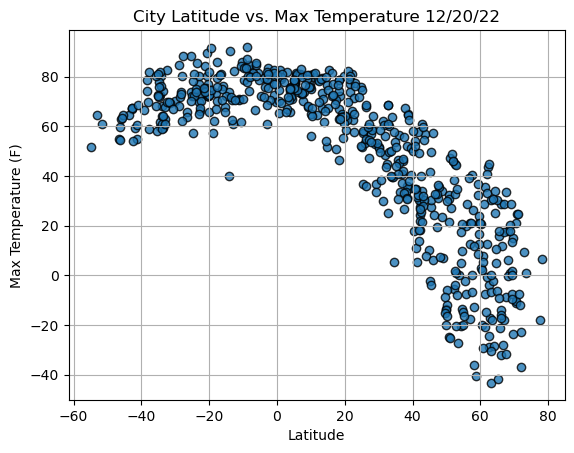

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats,
    max_temps,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

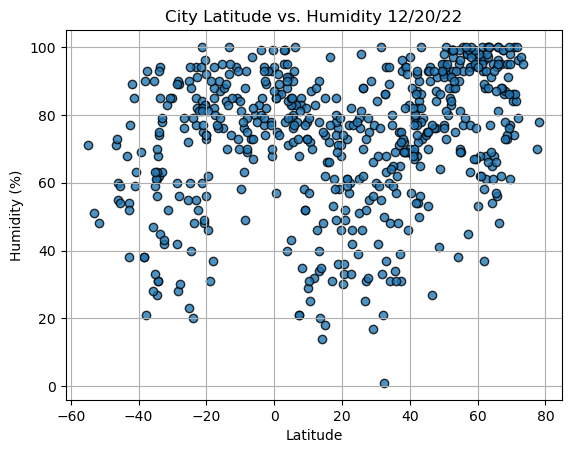

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(
    lats,
    humidity,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

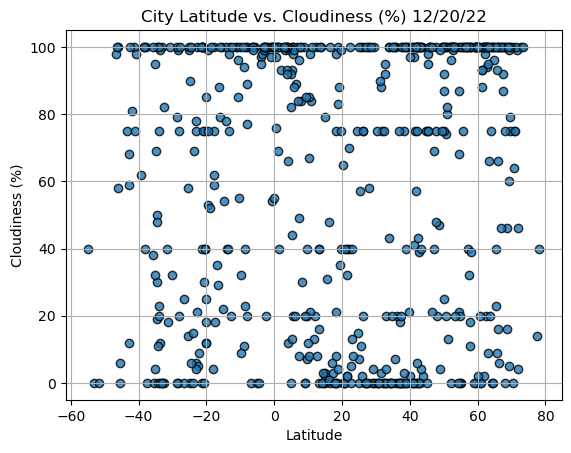

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(
    lats,
    cloudiness,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

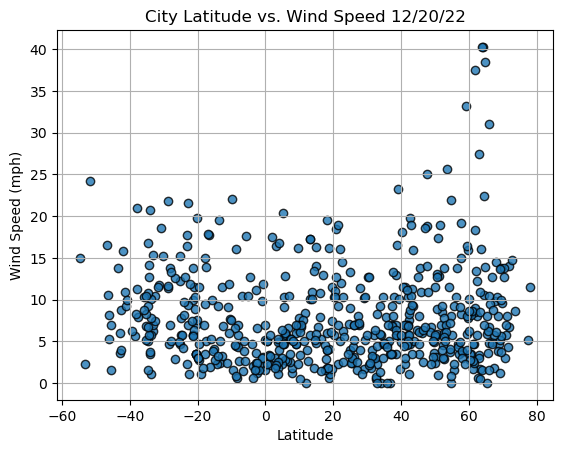

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(
    lats,
    wind_speed,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                Srednekolymsk
Country                        RU
Date          2022-12-21 00:41:22
Lat                         67.45
Lng                      153.6833
Max Temp                    -8.79
Humidity                       99
Cloudiness                     92
Wind Speed                   1.81
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
576     True
577     True
578     True
579     True
580    False
Name: Lat, Length: 581, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Khatanga,RU,2022-12-21 00:41:19,71.9667,102.5000,-22.86,79,4,13.98
3,Klaksvik,FO,2022-12-21 00:41:20,62.2266,-6.5890,43.72,88,98,13.44
6,Kodiak,US,2022-12-21 00:41:20,57.7900,-152.4072,26.11,63,100,14.97
10,Sinnamary,GF,2022-12-21 00:41:21,5.3833,-52.9500,77.23,83,100,10.27
11,Ternate,ID,2022-12-21 00:41:22,0.8000,127.4000,82.44,75,100,3.22


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

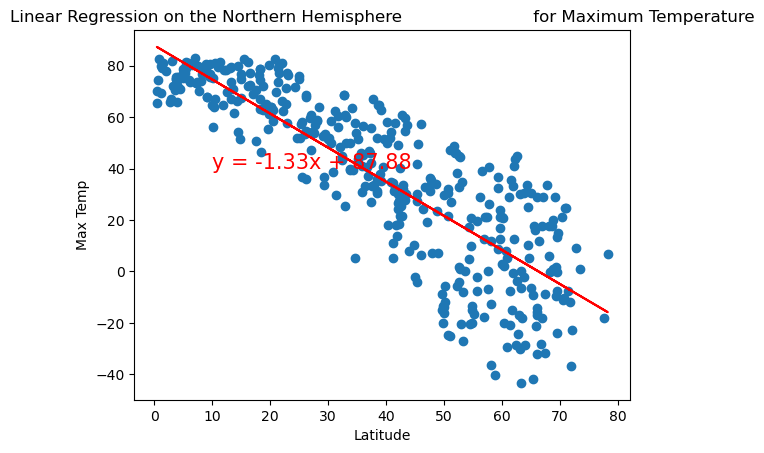

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature",
    "Max Temp",
    (10, 40),
)

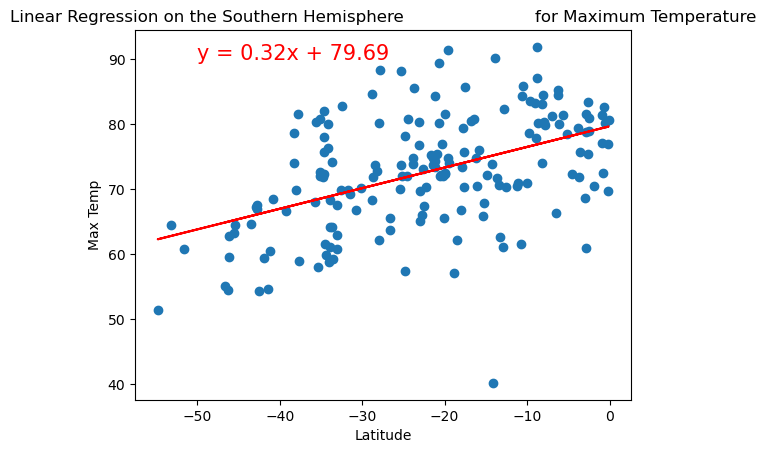

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature",
    "Max Temp",
    (-50, 90),
)

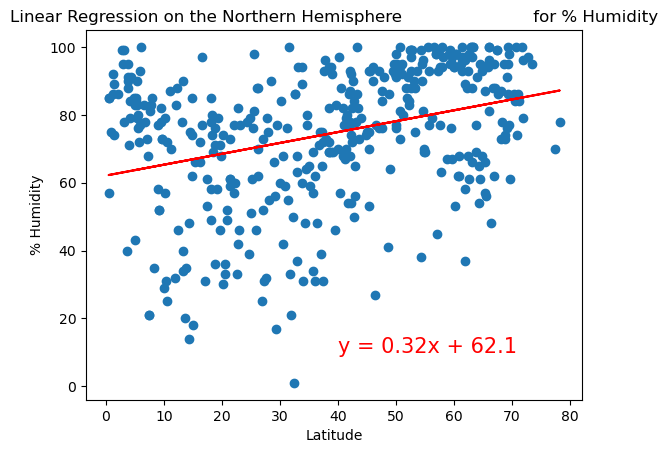

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Northern Hemisphere \
                        for % Humidity",
    "% Humidity",
    (40, 10),
)

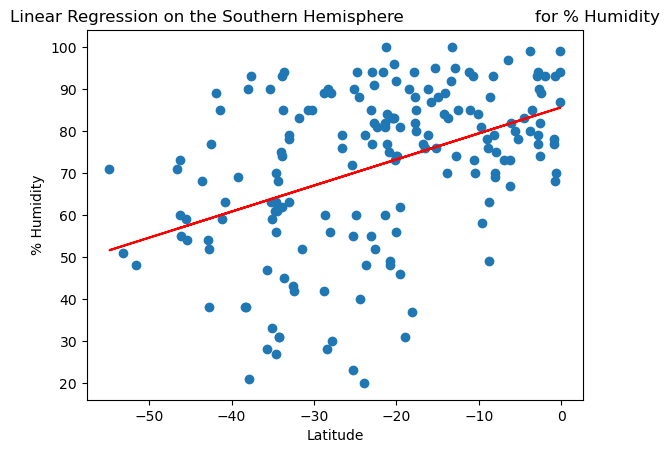

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Southern Hemisphere \
                        for % Humidity",
    "% Humidity",
    (-50, 15),
)

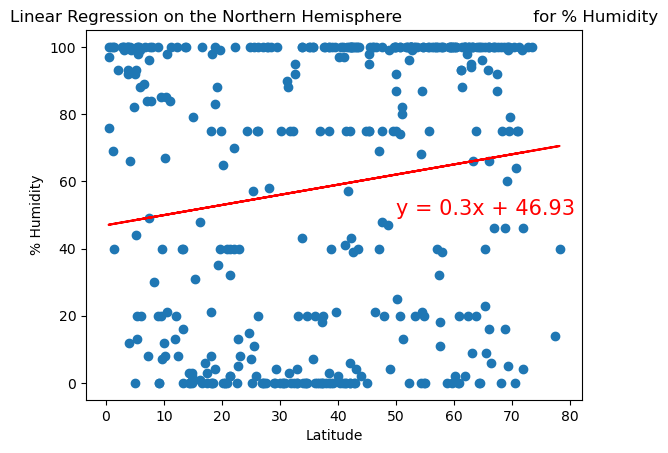

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Northern Hemisphere \
                        for % Humidity",
    "% Humidity",
    (50, 50),
)

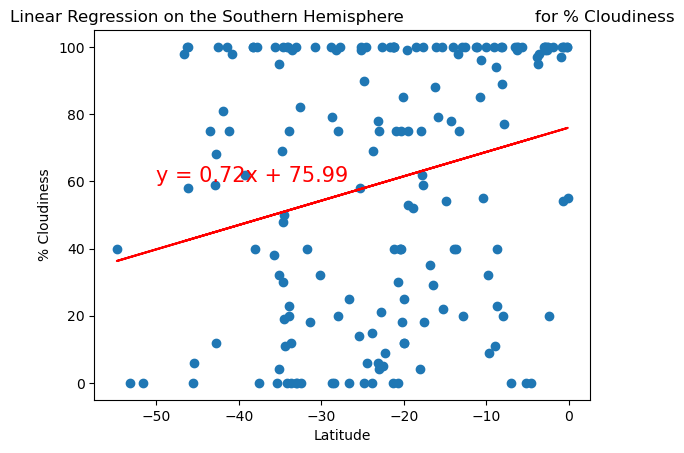

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Southern Hemisphere \
                        for % Cloudiness",
    "% Cloudiness",
    (-50, 60),
)

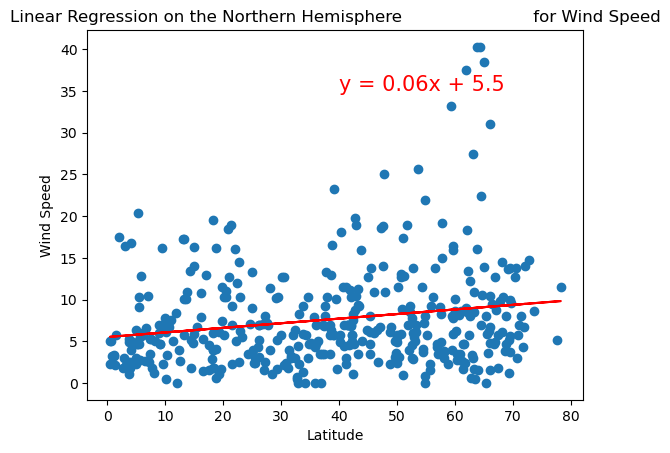

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Northern Hemisphere \
                        for Wind Speed",
    "Wind Speed",
    (40, 35),
)

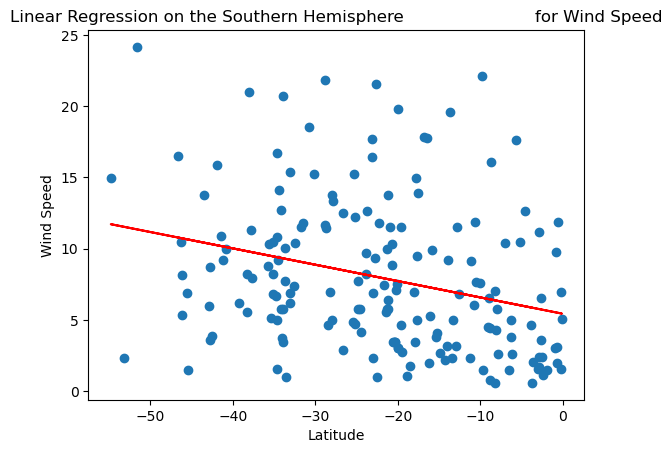

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values,
    y_values,
    "Linear Regression on the Southern Hemisphere \
                        for Wind Speed",
    "Wind Speed",
    (-50, 35),
)